In [6]:
## Airbnb Host Analysis

In [7]:
# import modules
import os
import csv
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# import modules for visualization
import matplotlib.pyplot as plt
import hvplot.pandas
import holoviews as hv
from holoviews import opts

In [17]:
# create an Airbnb dataframe
airbnb_df = pd.read_csv('/Users/valkeeranan/Desktop/Data Analytics Class Files/DATA-PT-WEST-SEPTEMBER-091624/data_class_project_1/Resources/air bnb csv with edits.csv')
airbnb_df.head(5)

id                                               name  host_id  \
0   109  Amazing bright elegant condo park front *UPGRA...      521   
1  2708  Beautiful Furnish Mirrored Mini-Suite w/ Firep...     3008   
2  2732                              Zen Life at the Beach     3041   
3  2864             * Beautiful Master Suite/Jacuzzi Tub/*     3207   
4  5728    Tiny Home in Artistic Oasis near Venice and LAX     9171   

        host_name  host_since host_is_superhost host_identity_verified  \
0           Paolo  27-06-2008                 f                      t   
1           Chas.  16-09-2008                 t                      t   
2  Yoga Priestess  17-09-2008                 f                      t   
3       Bernadine  25-09-2008                 f                      t   
4           Sanni    5/3/2009                 t                      t   

  instant_bookable  accommodates  \
0                f             6   
1                t             1   
2                f             1   
3                t             2   
4                f             2   

                                           amenities  ... bedrooms beds price  \
0  ["Elevator", "Cable TV", "Air conditioning", "...  ...      2.0  3.0   115   
1  ["Host greets you", "Elevator", "Air condition...  ...      1.0  1.0    71   
2  ["Cooking basics", "Host greets you", "Smoke a...  ...      1.0  1.0   155   
3  ["Host greets you", "Air conditioning", "Carbo...  ...      1.0  1.0    50   
4  ["Lock on bedroom door", "Fire extinguisher", ...  ...      1.0  1.0    60   

   minimum_nights  maximum_nights number_of_reviews last_review  \
0              30             730                 2  15-05-2016   
1              30             366                27   6/10/2020   
2               1             180                21  27-12-2019   
3              30             730                 0         NaN   
4              30            1125               310  29-04-2020   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.02                               1               216  
1               0.35                               2               360  
2               0.18                               2               337  
3                NaN                               1                 0  
4               2.25                               5               337  

[5 rows x 28 columns]

In [18]:
# identify states
states = airbnb_df['State'].unique()
states

array(['California', 'Illinois', 'Florida', 'Hawaii', 'Nevada',
       'New York ', 'Tennessee', 'DC', 'Washington'], dtype=object)

In [19]:
# get column names list
airbnb_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'host_since', 'host_is_superhost',
       'host_identity_verified', 'instant_bookable', 'accommodates',
       'amenities', 'State', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'property_type', 'room_type', 'bathrooms',
       'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [20]:
# Metros that are represented in the data
metros_df = airbnb_df["neighbourhood_group"].unique()
metros_df

array(['Los Angeles', 'San Diego County', 'San Francisco', 'San Mateo',
       'Saint Clara County', ' Santa Cruz', 'Chicago', 'Broward County',
       'Hawaii', 'Kauai', 'Maui', 'Honolulu', 'Clark County', 'Manhattan',
       'Brooklyn', 'Queens', 'Staten Island', 'Bronx', 'Nashville',
       'Washington D.C', 'Seattle'], dtype=object)

In [21]:
# Cities that are represented in the data
cities_df = airbnb_df["neighbourhood"].unique()
cities_df

array(['Culver City', 'Hollywood', 'Santa Monica', 'Bellflower',
       'Del Rey', 'Atwater Village', 'Long Beach', 'Venice',
       'Redondo Beach', 'Mid-Wilshire', 'Harbor Gateway',
       'Hollywood Hills', 'Torrance', 'Mid-City', 'Valley Village',
       'East Hollywood', 'Silver Lake', 'Highland Park',
       'Mount Washington', 'Sawtelle', 'West Los Angeles',
       'Woodland Hills', 'Los Feliz', 'Mar Vista', 'Malibu', 'Downtown',
       'Van Nuys', 'Lynwood', 'Glendale', 'Beverly Hills', 'Carthay',
       'Harvard Heights', 'Glassell Park', 'West Hollywood',
       'Cheviot Hills', 'Encino', 'Lakewood', 'View Park-Windsor Hills',
       'North Hills', 'Tujunga', 'Westchester', 'Echo Park',
       'Sherman Oaks', 'Carson', 'North Hollywood', 'Altadena',
       'Calabasas', 'Pacific Palisades', 'Hollywood Hills West',
       'Topanga', 'Valley Glen', 'Fairfax', 'Manhattan Beach',
       'Unincorporated Santa Monica Mountains', 'Elysian Valley', 'Palms',
       'Pico-Robertson', 'S

In [22]:
# Number of unique hosts
hosts_count = airbnb_df["host_id"].nunique()
hosts_count

86089

In [58]:
# Calculate the number of hosts per metro area
total_hosts_per_metro = airbnb_df.groupby("neighbourhood_group")["host_id"].nunique().sort_values(ascending=False)
total_hosts_per_metro

neighbourhood_group
Los Angeles           18389
Manhattan             11739
Brooklyn              11477
Washington D.C         4654
Broward County         4476
San Diego County       4240
San Francisco          3709
Clark County           3687
Chicago                3487
Queens                 3055
Nashville              2936
Honolulu               2502
Saint Clara County     2467
Seattle                2420
Hawaii                 2185
Maui                   2042
San Mateo              1477
Kauai                   891
 Santa Cruz             723
Bronx                   654
Staten Island           203
Name: host_id, dtype: int64

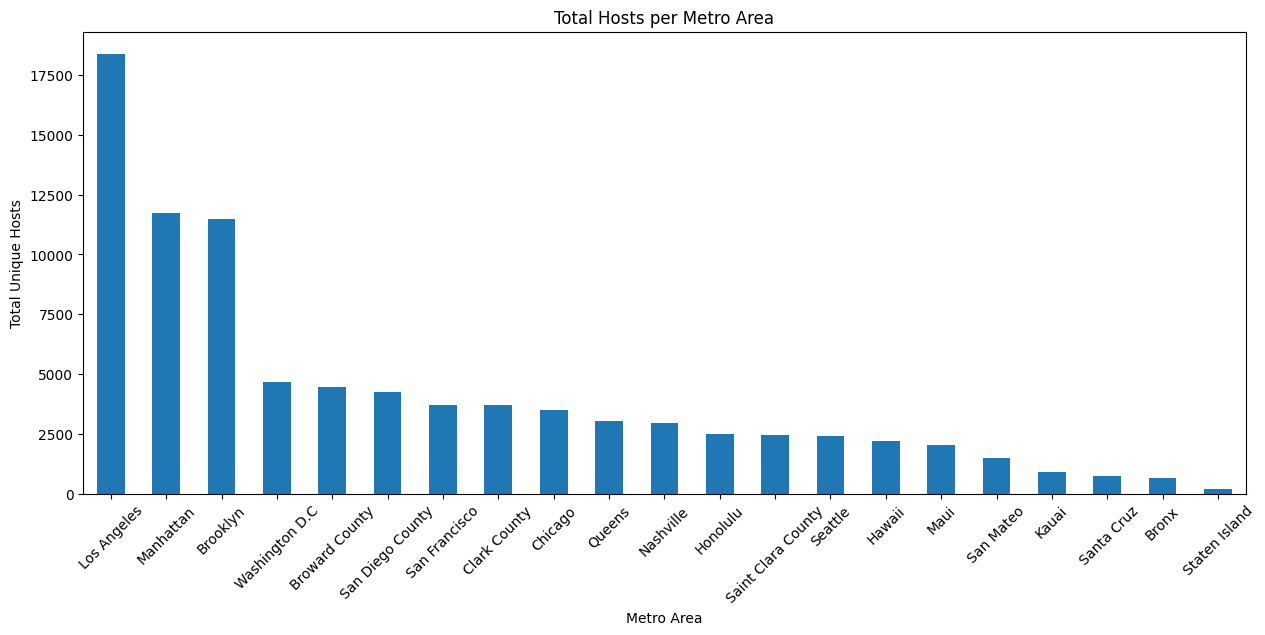

In [59]:
# Create the bar chart
total_hosts_per_metro.plot(kind='bar', figsize=(15, 6))

# Set the chart title and axis labels
plt.title('Total Hosts per Metro Area')
plt.xlabel('Metro Area')
plt.ylabel('Total Unique Hosts')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the chart
plt.show()

# Hosts vs. Superhosts Analysis by Metro

In [63]:
# Number of Unique Hosts and Superhosts in each Metro
# Filter the dataset on the `host_is_superhost` column
superhosts_df = airbnb_df[airbnb_df['host_is_superhost'] == 't']
hosts_df = airbnb_df[airbnb_df['host_is_superhost'] == 'f']

# Count hosts superhosts in each neighborhood group
superhosts_per_metro = superhosts_df.groupby('neighbourhood_group')['host_id'].nunique().sort_values(ascending=False)
hosts_per_metro = hosts_df.groupby('neighbourhood_group')['host_id'].nunique().sort_values(ascending=False)

# Print the names of the first 5 neighborhood groups with the number of superhosts
superhosts_per_metro.head()


neighbourhood_group
Los Angeles         5584
Brooklyn            2146
San Diego County    1931
Nashville           1747
Manhattan           1711
Name: host_id, dtype: int64

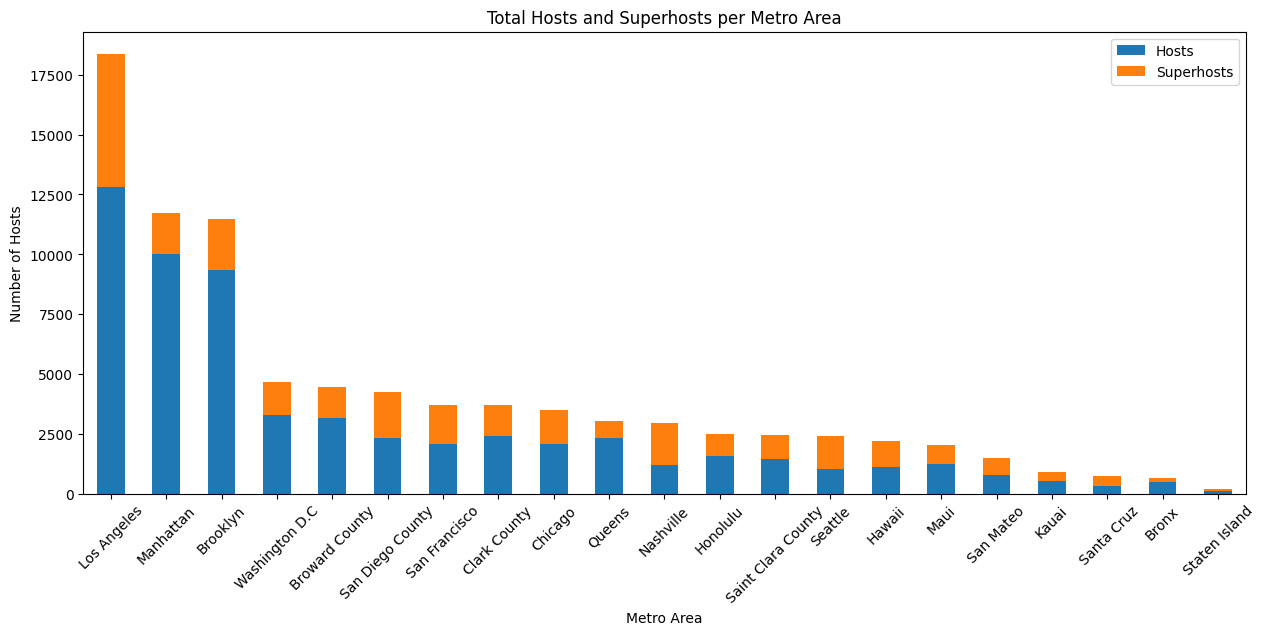

In [62]:
# Combine the results into a single DataFrame
combined_df = pd.DataFrame({
    'Total Hosts': total_hosts_per_metro,
    'Hosts': hosts_per_metro,
    'Superhosts': superhosts_per_metro
})

# Sort the DataFrame in descending order based on the total number of hosts
combined_df = combined_df.sort_values(by='Total Hosts', ascending=False)

# Plotting the bar chart
combined_df[['Hosts', 'Superhosts']].plot(kind='bar', stacked=True, figsize=(15, 6))

# Set the chart title and axis labels
plt.title('Total Hosts and Superhosts per Metro Area')
plt.xlabel('Metro Area')
plt.ylabel('Number of Hosts')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the chart
plt.show()


## Host Since Analysis by Year

In [64]:
# Clean up host_since date format
# Reformat dates and ensure 'host_since' is of string type
airbnb_df['host_since'] = airbnb_df['host_since'].astype(str)

# Now convert to datetime, allowing for multiple formats
# replace '-' with '/' in the 'host_since' column to standardize the format
airbnb_df['host_since'] = airbnb_df['host_since'].str.replace('-', '/')
airbnb_df['host_since'] = pd.to_datetime(airbnb_df['host_since'], dayfirst=False, errors='coerce')
airbnb_df.head(5)

id                                               name  host_id  \
0   109  Amazing bright elegant condo park front *UPGRA...      521   
1  2708  Beautiful Furnish Mirrored Mini-Suite w/ Firep...     3008   
2  2732                              Zen Life at the Beach     3041   
3  2864             * Beautiful Master Suite/Jacuzzi Tub/*     3207   
4  5728    Tiny Home in Artistic Oasis near Venice and LAX     9171   

        host_name host_since host_is_superhost host_identity_verified  \
0           Paolo 2008-06-27                 f                      t   
1           Chas. 2008-09-16                 t                      t   
2  Yoga Priestess 2008-09-17                 f                      t   
3       Bernadine 2008-09-25                 f                      t   
4           Sanni 2009-03-05                 t                      t   

  instant_bookable  accommodates  \
0                f             6   
1                t             1   
2                f             1   
3                t             2   
4                f             2   

                                           amenities  ... beds price  \
0  ["Elevator", "Cable TV", "Air conditioning", "...  ...  3.0   115   
1  ["Host greets you", "Elevator", "Air condition...  ...  1.0    71   
2  ["Cooking basics", "Host greets you", "Smoke a...  ...  1.0   155   
3  ["Host greets you", "Air conditioning", "Carbo...  ...  1.0    50   
4  ["Lock on bedroom door", "Fire extinguisher", ...  ...  1.0    60   

  minimum_nights  maximum_nights  number_of_reviews last_review  \
0             30             730                  2  15-05-2016   
1             30             366                 27   6/10/2020   
2              1             180                 21  27-12-2019   
3             30             730                  0         NaN   
4             30            1125                310  29-04-2020   

  reviews_per_month  calculated_host_listings_count  availability_365  \
0              0.02                               1               216   
1              0.35                               2               360   
2              0.18                               2               337   
3               NaN                               1                 0   
4              2.25                               5               337   

   host_since_year  
0           2008.0  
1           2008.0  
2           2008.0  
3           2008.0  
4           2009.0  

[5 rows x 29 columns]

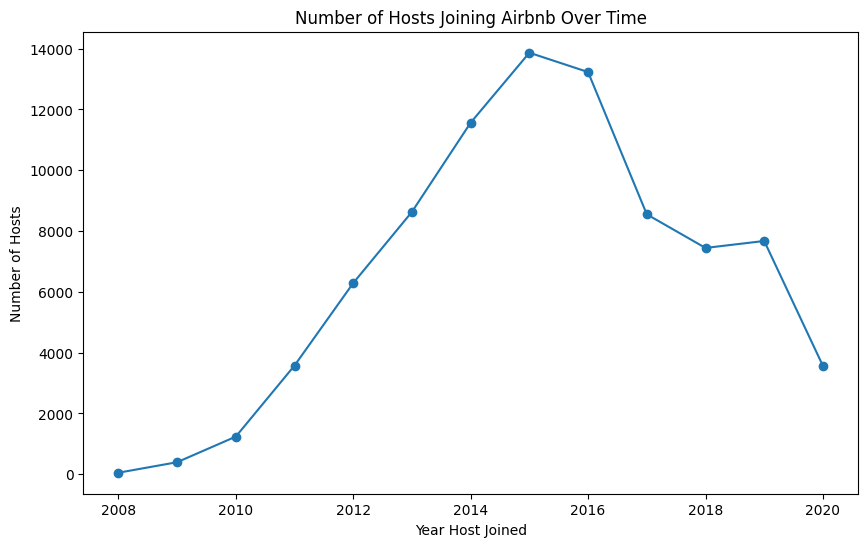

In [32]:
# Host since analysis by year
# Convert the host_since column to datetime
airbnb_df['host_since'] = pd.to_datetime(airbnb_df['host_since'], dayfirst=True, errors='coerce')

# Extract the year from host_since
airbnb_df['host_since_year'] = pd.DatetimeIndex(airbnb_df['host_since']).year

# Count the number of hosts who joined Airbnb each year
hosts_per_year = airbnb_df.groupby('host_since_year')['host_id'].nunique()

# Create a line chart
hosts_per_year.plot(kind='line', marker='o', figsize=(10, 6))

# Set title and labels
plt.title('Number of Hosts Joining Airbnb Over Time')
plt.xlabel('Year Host Joined')
plt.ylabel('Number of Hosts')

# Show the chart
plt.show()

In [81]:
# Count the number of listings for each property type in each metro area
property_type_counts = airbnb_df.pivot_table(
    index='neighbourhood_group',
    columns='property_type',
    aggfunc='size'
)

# Fill NaN values with 0
property_type_counts = property_type_counts.fillna(0)

# Reset the index to make 'neighbourhood_group' a column
property_type_counts = property_type_counts.reset_index()

# Melt the dataframe to long format
melted_df = property_type_counts.melt(
    id_vars=['neighbourhood_group'],
    var_name='property_type',
    value_name='count'
)

# Rename the columns
melted_df.columns = ['Metro Area', 'Property Type', 'Count']

# Sort the melted DataFrame by 'Count' in descending order
melted_df = melted_df.sort_values(by='Count', ascending=False)

# Show the first 10 rows
melted_df.head(30)


Metro Area              Property Type   Count
220            Manhattan           Entire apartment  8748.0
219          Los Angeles           Entire apartment  7689.0
212             Brooklyn           Entire apartment  5468.0
821             Brooklyn  Private room in apartment  5390.0
450          Los Angeles               Entire house  5368.0
326                 Maui         Entire condominium  5205.0
829            Manhattan  Private room in apartment  4963.0
1311         Los Angeles      Private room in house  4848.0
214              Chicago           Entire apartment  2822.0
322             Honolulu         Entire condominium  2809.0
213       Broward County           Entire apartment  2662.0
230       Washington D.C           Entire apartment  2567.0
828          Los Angeles  Private room in apartment  2365.0
320         Clark County         Entire condominium  2207.0
226        San Francisco           Entire apartment  2045.0
456     San Diego County               Entire house  2010.0
318       Broward County         Entire condominium  1986.0
444       Broward County               Entire house  1923.0
453            Nashville               Entire house  1914.0
225     San Diego County           Entire apartment  1810.0
323                Kauai         Entire condominium  1695.0
408          Los Angeles          Entire guesthouse  1695.0
1316  Saint Clara County      Private room in house  1688.0
446         Clark County               Entire house  1664.0
321               Hawaii         Entire condominium  1406.0
832               Queens  Private room in apartment  1338.0
330     San Diego County         Entire condominium  1302.0
324          Los Angeles         Entire condominium  1295.0
1307        Clark County      Private room in house  1259.0
447               Hawaii               Entire house  1117.0

In [85]:
# Create a mapping dictionary to combine property types
property_type_mapping = {
    'Entire apartment': 'Entire Apartment',
    'Entire house': 'Entire House',
    'Entire guesthouse': 'Guesthouse',
    'Private room in house': 'Private Room',
    'Hotel Room': 'Hotel',
    'Condo': 'Entire Condominium',
    'Entire condominium': 'Entire Condominium',
    'Villa': 'Luxury',
    'Treehouse': 'Unique Stay',
    'Cabin': 'Unique Stay',
    'Boat': 'Unique Stay',
    'Hostel': 'Budget',
    'B&B': 'Hotel',
}

# Apply the mapping to create a new column in the DataFrame
airbnb_df['Property Type Grouped'] = airbnb_df['property_type'].map(property_type_mapping)

In [86]:
# Count the number of listings for each property type in each metro area
property_type_counts = airbnb_df.pivot_table(
    index='neighbourhood_group',
    columns='Property Type Grouped',
    aggfunc='size'
)

# Fill NaN values with 0
property_type_counts = property_type_counts.fillna(0)

# Reset the index to make 'neighbourhood_group' a column
property_type_counts = property_type_counts.reset_index()

# Melt the dataframe to long format
melted_df = property_type_counts.melt(
    id_vars=['neighbourhood_group'],
    var_name='Property Type Grouped',
    value_name='count'
)

# Rename the columns
melted_df.columns = ['Metro Area', 'Property Type Grouped', 'Count']

# Sort the melted DataFrame by 'Count' in descending order
melted_df = melted_df.sort_values(by='Count', ascending=False)

# Show the first 10 rows
melted_df.head(20)

Metro Area Property Type Grouped   Count
10           Manhattan      Entire Apartment  8748.0
9          Los Angeles      Entire Apartment  7689.0
2             Brooklyn      Entire Apartment  5468.0
30         Los Angeles          Entire House  5368.0
53                Maui    Entire condominium  5205.0
93         Los Angeles          Private Room  4848.0
4              Chicago      Entire Apartment  2822.0
49            Honolulu    Entire condominium  2809.0
3       Broward County      Entire Apartment  2662.0
20      Washington D.C      Entire Apartment  2567.0
47        Clark County    Entire condominium  2207.0
16       San Francisco      Entire Apartment  2045.0
36    San Diego County          Entire House  2010.0
45      Broward County    Entire condominium  1986.0
24      Broward County          Entire House  1923.0
33           Nashville          Entire House  1914.0
15    San Diego County      Entire Apartment  1810.0
72         Los Angeles            Guesthouse  1695.0
50               Kauai    Entire condominium  1695.0
98  Saint Clara County          Private Room  1688.0
26        Clark County          Entire House  1664.0
48              Hawaii    Entire condominium  1406.0
57    San Diego County    Entire condominium  1302.0
51         Los Angeles    Entire condominium  1295.0
89        Clark County          Private Room  1259.0
27              Hawaii          Entire House  1117.0
12           Nashville      Entire Apartment  1116.0
18             Seattle      Entire Apartment  1093.0
13              Queens      Entire Apartment  1070.0
87      Broward County          Private Room   980.0

In [93]:
# Pivot the melted DataFrame to create a matrix for the heatmap
heatmap_data = melted_df.pivot_table(index='Property Type Grouped', columns='Metro Area', values='Count', fill_value=0)

# Sort the heatmap_data by the sum of each row in descending order
heatmap_data = heatmap_data.loc[heatmap_data.sum(axis=1).sort_values(ascending=True).index]

# Create the heatmap using hvPlot with enlarged size
heatmap = heatmap_data.hvplot.heatmap(
    cmap='YlGnBu',  # Color map
    colorbar=True,  # Show color bar
    title='Heatmap of Property Types by Metro Area',
    xlabel='Metro Area',
    ylabel='Property Type',
    width=800,  # Adjust width
    height=600,  # Adjust height
)

# Show the heatmap with angled x-axis labels
heatmap.opts(xrotation=45)  # Rotate x-axis labels by 45 degrees

# Show the heatmap
heatmap

:HeatMap   [columns,index]   (value)